In [1]:
import pandas as pd
import numpy as np
import datetime

## Exercise 1
Load the data and rearrange it as a pandas DataFrame with the following structure:

- One column per stock and concept: Open, High, Low, Close, Volume
- Date as index (properly parsed)
- Rows sorted by date, ascending

Be ready for dealing with errors in the names and some missing values.
Paste here the `.dtypes` of the resulting DataFrame.

In [2]:
df = pd.read_csv('stocks_unclean.csv', index_col = 'date', parse_dates = ['date'], dayfirst = True)
df = df.sort_values('date', ascending = True)
df.head()

,variable,value
date,,
2019-12-31,high_GOOG,1.338000e+03
2019-12-31,high_AAPL,7.342000e+01
2019-12-31,open_MSFT,1.567700e+02
2019-12-31,volume_MSFT,1.836940e+07
2019-12-31,close_AMZN,1.847840e+03


In [3]:
# Now all the stocks are labeled the same
df = df.replace({"variable" : { "(GOG)": "GOOG", "(_APL)":"_AAPL","(_AMZ\\b)":"_AMZN","(MST)":"MSFT"}}, regex=True)
df['variable'].value_counts()

close_GOOG     522
volume_GOOG    522
volume_AMZN    522
open_GOOG      522
volume_MSFT    522
open_MSFT      522
low_AMZN       522
close_AMZN     522
low_MSFT       522
open_AMZN      522
high_GOOG      522
close_MSFT     522
high_MSFT      522
low_GOOG       522
high_AMZN      522
open_AAPL      519
close_AAPL     519
low_AAPL       519
high_AAPL      518
volume_AAPL    513
Name: variable, dtype: int64

In [4]:
df = df.pivot_table(index = 'date', columns = 'variable', values = 'value')

In [5]:
df = df.interpolate(method = "linear",limit_direction ="forward")
df

variable,close_AAPL,close_AMZN,close_GOOG,close_MSFT,high_AAPL,high_AMZN,high_GOOG,high_MSFT,low_AAPL,low_AMZN,low_GOOG,low_MSFT,open_AAPL,open_AMZN,open_GOOG,open_MSFT,volume_AAPL,volume_AMZN,volume_GOOG,volume_MSFT
date,,,,,,,,,,,,,,,,,,,,
2019-12-31,73.412498,1847.839966,1337.020020,157.699997,73.419998,1853.260010,1338.000000,157.770004,72.379997,1832.229980,1329.084961,156.449997,72.482498,1842.000000,1330.109985,156.770004,100805600.0,2506500.0,961800.0,18369400.0
2020-01-02,75.087502,1898.010010,1367.369995,160.619995,75.150002,1898.010010,1368.140015,160.729996,73.797501,1864.150024,1341.550049,158.330002,74.059998,1875.000000,1341.550049,158.779999,135480400.0,4029000.0,1406600.0,22622100.0
2020-01-03,74.357498,1874.969971,1360.660034,158.619995,75.144997,1886.199951,1372.500000,159.949997,74.125000,1864.500000,1345.543945,157.419998,74.287498,1864.500000,1347.859985,158.320007,146322800.0,3764400.0,1186400.0,21116200.0
2020-01-06,74.949997,1902.880005,1394.209961,159.029999,74.989998,1903.689941,1396.500000,159.100006,73.187500,1860.000000,1367.961975,156.509995,73.447502,1860.000000,1350.000000,157.080002,118387200.0,4061800.0,1732300.0,20813700.0
2020-01-07,74.597504,1906.859985,1393.339966,157.580002,75.224998,1913.890015,1402.989990,159.669998,74.370003,1892.040039,1390.380005,157.320007,74.959999,1904.500000,1397.939941,159.320007,108872000.0,4044900.0,1502700.0,21634100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,166.229996,3125.979980,2713.040039,303.329987,171.080002,3185.000000,2767.989990,313.910004,165.940002,3125.000000,2710.000000,302.700012,170.000000,3175.239990,2738.770020,306.290009,94815000.0,2662100.0,1039800.0,45933900.0
2022-01-20,164.509995,3033.350098,2670.129883,301.600006,169.679993,3160.000000,2758.239990,311.649994,164.179993,3027.020020,2662.889893,301.140015,166.979996,3135.320068,2730.280029,309.070007,91420500.0,3598700.0,1096500.0,35380700.0
2022-01-21,162.410004,2852.860107,2601.840088,296.029999,166.330002,3018.000000,2695.209961,304.109985,162.300003,2841.409912,2600.020020,295.609985,164.419998,2999.000000,2660.239990,302.690002,122501300.0,8164200.0,2087000.0,57118300.0


In [6]:
df.dtypes

variable
close_AAPL     float64
close_AMZN     float64
close_GOOG     float64
close_MSFT     float64
high_AAPL      float64
high_AMZN      float64
high_GOOG      float64
high_MSFT      float64
low_AAPL       float64
low_AMZN       float64
low_GOOG       float64
low_MSFT       float64
open_AAPL      float64
open_AMZN      float64
open_GOOG      float64
open_MSFT      float64
volume_AAPL    float64
volume_AMZN    float64
volume_GOOG    float64
volume_MSFT    float64
dtype: object

## Question 2
Visualize the data as follows:

- Part 1: Create a 2x2 grid of plots in which you plot the "Open" in green and "Close" in red for each stock (0.5 points).
- Part 2: Repeat the 2x2 grid but resampling with the weekly average of "Open" and "Close" (0.5 points)
- Part 3: Add meaningful visualizations of your choice (0.5 points)

In [7]:
import matplotlib.pyplot as plt

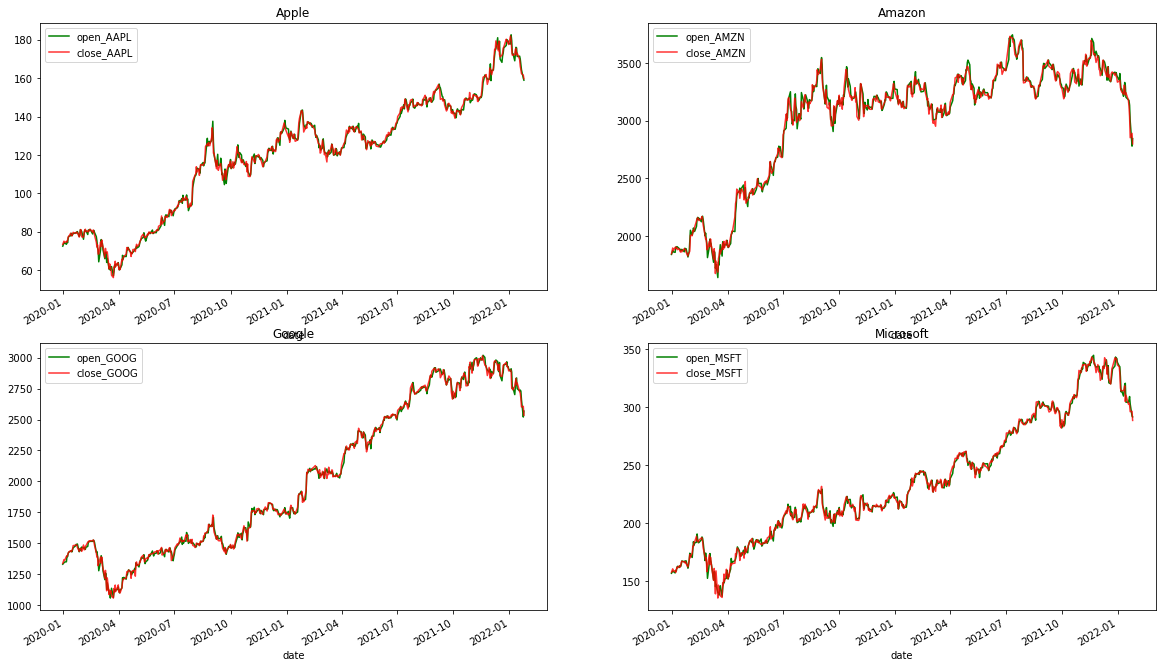

In [8]:
#PART 1

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,12))

df['open_AAPL'].plot(color = 'green', ax = axes[0,0])
df['close_AAPL'].plot(color = 'red', alpha = .8, ax = axes[0,0])
axes[0,0].set_title("Apple")

df['open_AMZN'].plot(color = 'green', ax = axes[0,1])
df['close_AMZN'].plot(color = 'red', alpha = .8, ax = axes[0,1])
axes[0,1].set_title('Amazon')

df['open_GOOG'].plot(color = 'green', ax = axes[1,0])
df['close_GOOG'].plot(color = 'red', alpha = .8, ax = axes[1,0])
axes[1,0].set_title('Google')

df['open_MSFT'].plot(color = 'green', ax = axes[1,1])
df['close_MSFT'].plot(color = 'red', alpha = .8, ax = axes[1,1])
axes[1,1].set_title('Microsoft')

axes[0,0].legend()
axes[1,0].legend()
axes[0,1].legend()
axes[1,1].legend()

In [9]:
# PART 2

WOG = df['open_GOOG'].resample('w').mean()
WCG = df['close_GOOG'].resample('w').mean()

WOAP = df['open_AAPL'].resample('w').mean()
WCAP = df['close_AAPL'].resample('w').mean()

WOA = df['open_AMZN'].resample('w').mean()
WCA = df['close_AMZN'].resample('w').mean()

WOM = df['open_MSFT'].resample('w').mean()
WCM = df['close_MSFT'].resample('w').mean()



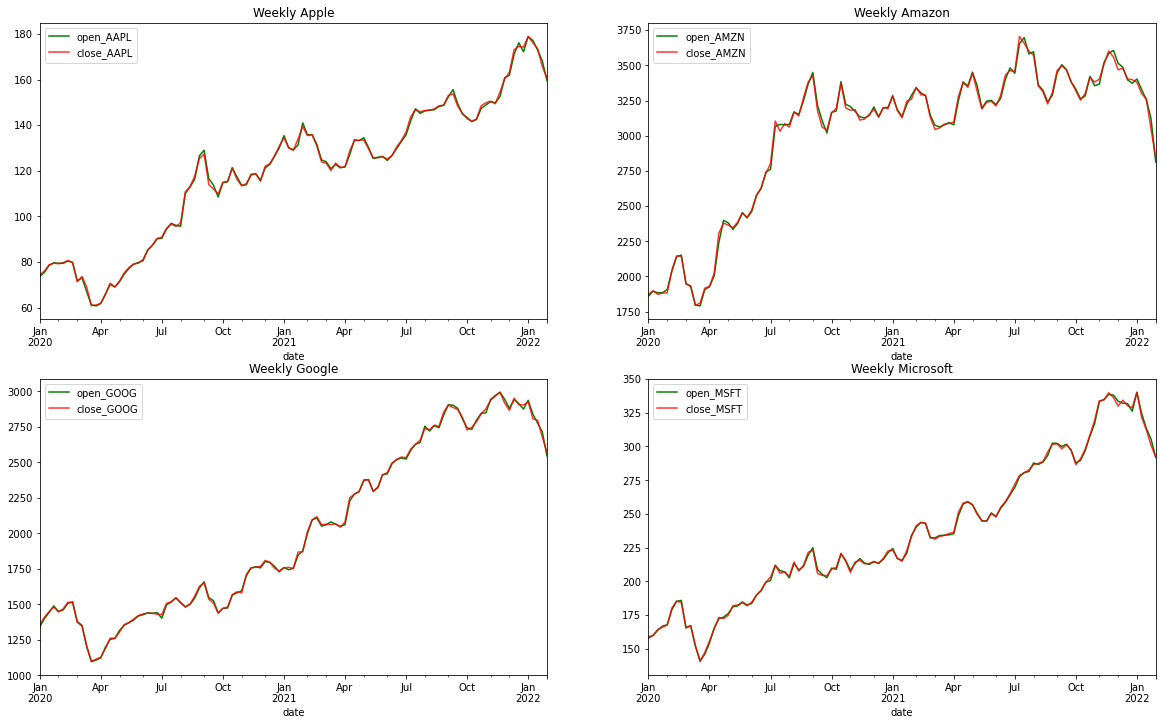

In [10]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,12))

WOAP.plot(color = 'green', ax = axes[0,0])
WCAP.plot(color = 'red', alpha = .8, ax = axes[0,0])
axes[0,0].set_title("Weekly Apple")

WOA.plot(color = 'green', ax = axes[0,1])
WCA.plot(color = 'red', alpha = .8, ax = axes[0,1])
axes[0,1].set_title('Weekly Amazon')

WOG.plot(color = 'green', ax = axes[1,0])
WCG.plot(color = 'red', alpha = .8, ax = axes[1,0])
axes[1,0].set_title('Weekly Google')

WOM.plot(color = 'green', ax = axes[1,1])
WCM.plot(color = 'red', alpha = .8, ax = axes[1,1])
axes[1,1].set_title('Weekly Microsoft')

axes[0,0].legend()
axes[1,0].legend()
axes[0,1].legend()
axes[1,1].legend()

There is a very big difference between the range and median of each stock's high for the day. Listed below are the min and max of each stock for reference.
Apple: 182.94
Amazon: 3773 2
Microsoft: 349.67
Google: 3037.0


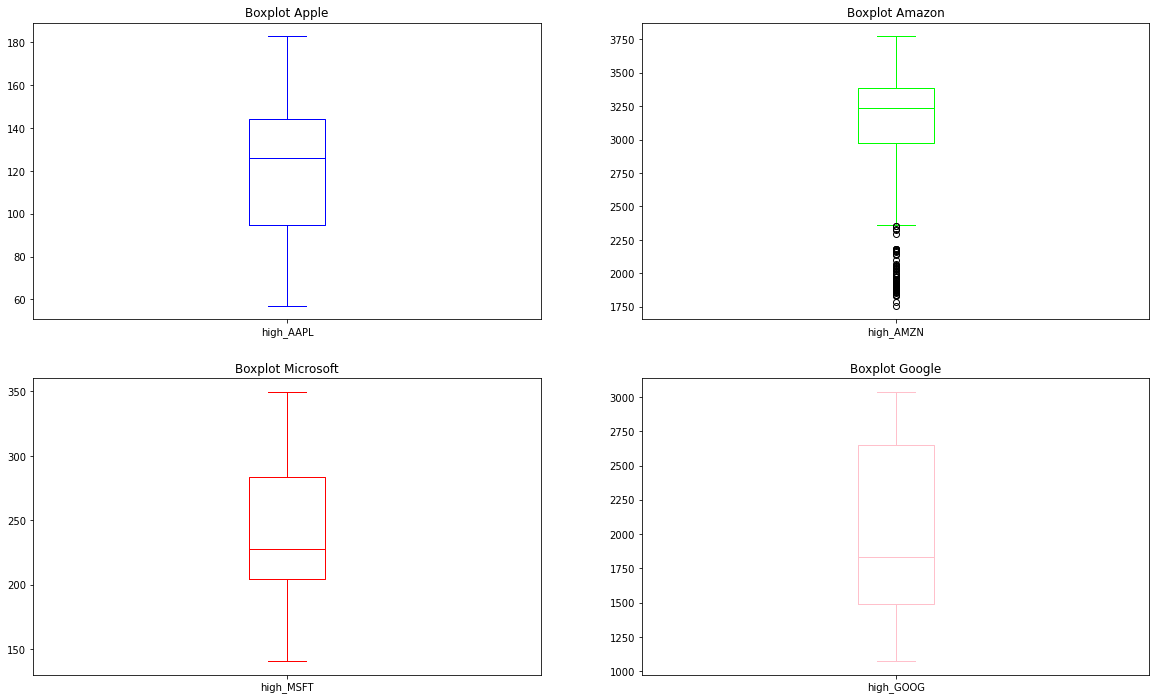

In [72]:
# PART 3
# Find a meaningful visualization
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (20,12))
#df.plot.box(by = ['high_AAPL', 'low_AAPL'], ax = ax)
df['high_AAPL'].plot.box(color = 'blue', ax =axes[0,0])
df['high_AMZN'].plot.box(color = 'lime', ax = axes[0,1])
df['high_MSFT'].plot.box(color = 'red', ax = axes[1,0])
df['high_GOOG'].plot.box(color = 'pink', ax = axes[1,1])
axes[0,0].set_title('Boxplot Apple')
axes[0,1].set_title("Boxplot Amazon")
axes[1,0].set_title('Boxplot Microsoft')
axes[1,1].set_title('Boxplot Google')


print("There is a very big difference between the range and median of each stock's high for the day. Listed below are the min and max of each stock for reference.")
print('Apple:', round(df['high_AAPL'].max(), 2))
print('Amazon:', round(df['high_AMZN'].max()),2)
print('Microsoft:', round(df['high_MSFT'].max(),2))
print('Google:', round(df['high_GOOG'].max(), 2))

## Question 3

Create a function that calculates the Return of Investment (ROI). Let's suppose you buy one stock one day, you hold it for N days (lookback period) and after N days you sell it. The ROI formula is:



$R O I equals fraction numerator F V I minus I V I over denominator I V I end fraction asterisk times 100$

- IVI: initial value of investment. This is the price at which you bought the stock
- FVI: final value of investment. This is the price at which you sold the stock
- ROI: Return of Investment. This is the percentage of increase in value of the investment

Now that we know how to calculate the ROI, create a function in Python that receives as parameters the following:

- lookback: the number of days you hold the stock
- name: the name of the stock, using the "Close" value of the stock
- data: the dataframe with the stock data


In [73]:
def roi(n, name, data):
    lookback = n
    fvi = data[f'close_{name}']
    ivi = fvi.shift(lookback)
    ROI = (fvi - ivi)/ivi* 100
    return ROI

In [74]:
roi(365,'GOOG', df).dropna()

date
2021-06-14    89.005400
2021-06-15    84.343661
2021-06-16    84.758122
2021-06-17    81.279721
2021-06-18    80.239580
                ...    
2022-01-19    81.536180
2022-01-20    78.472691
2022-01-21    75.762010
2022-01-24    73.065534
2022-01-25    66.927462
Name: close_GOOG, Length: 157, dtype: float64

## Question 4
Apply the ROI function to the portfolio. Create as many ROI columns as different stocks you have in the portfolio and plot them, representing for each stock:

- ROI after holding the stock for 365 days (red, dashed line) (0.5 points)
- ROI after holding the stock for 180 days (blue, dotted line) (0.5 points)
- ROI after holding the stock for 90 days (green, solid line) (0.5 points)


In [75]:
df['365_GOOG'] = roi(365,'GOOG', df)
df['365_AAPL'] = roi(365, 'AAPL', df)
df['365_AMZN'] = roi(365, 'AMZN', df)
df['365_MSFT'] = roi(365, 'MSFT', df)

df['180_GOOG'] = roi(180,'GOOG', df)
df['180_AAPL'] = roi(180, 'AAPL', df)
df['180_AMZN'] = roi(180, 'AMZN', df)
df['180_MSFT'] = roi(180, 'MSFT', df)

df['90_GOOG'] = roi(90,'GOOG', df)
df['90_AAPL'] = roi(90, 'AAPL', df)
df['90_AMZN'] = roi(90, 'AMZN', df)
df['90_MSFT'] = roi(90, 'MSFT', df)

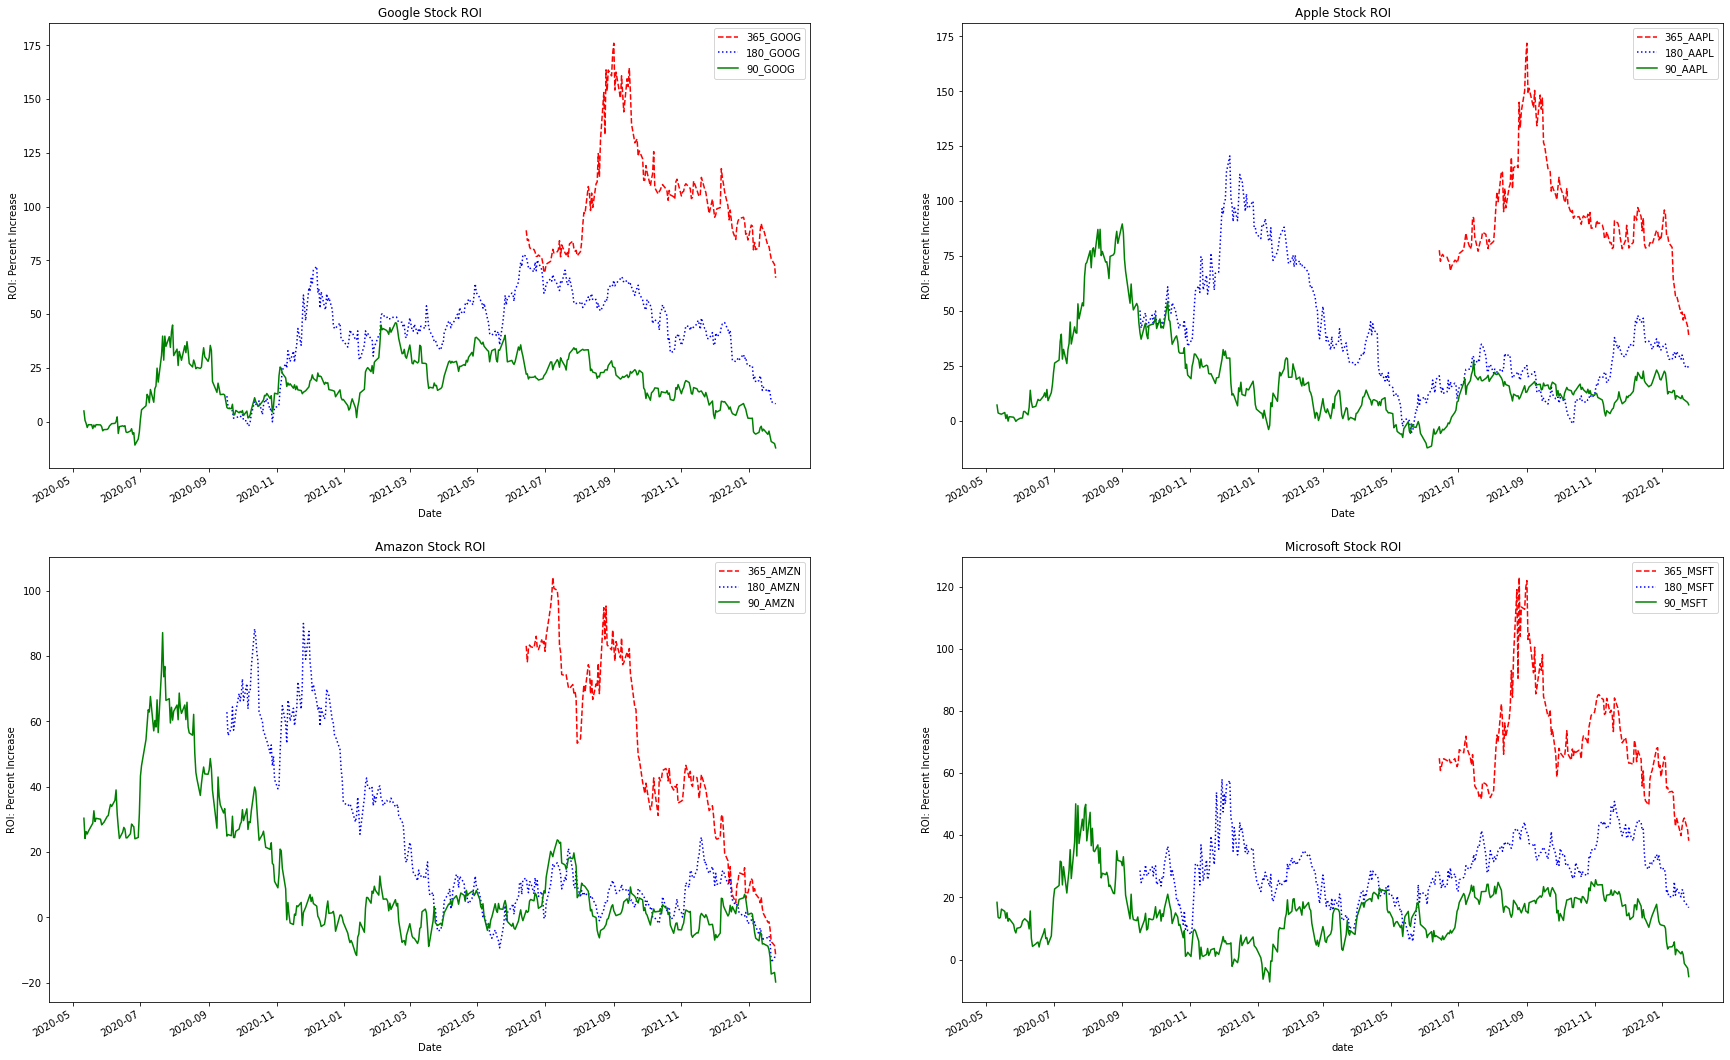

In [76]:
fig, axes = plt.subplots(nrows= 2, ncols = 2, figsize = (30,20))

df['365_GOOG'].plot(color = 'red', linestyle = 'dashed', ax = axes[0,0])
df['180_GOOG'].plot(color = 'blue', linestyle = 'dotted', ax = axes[0,0])
df['90_GOOG'].plot(color = 'green', ax = axes[0,0])
axes[0,0].set_title('Google Stock ROI')
axes[0,0].set_ylabel("ROI: Percent Increase")
axes[0,0].set_xlabel('Date')

df['365_AAPL'].plot(color = 'red', linestyle = 'dashed', ax = axes[0,1])
df['180_AAPL'].plot(color = 'blue', linestyle = 'dotted', ax = axes[0,1])
df['90_AAPL'].plot(color = 'green', ax = axes[0,1])
axes[0,1].set_title('Apple Stock ROI')
axes[0,1].set_ylabel("ROI: Percent Increase")
axes[0,1].set_xlabel('Date')

df['365_AMZN'].plot(color = 'red', linestyle = 'dashed', ax = axes[1,0])
df['180_AMZN'].plot(color = 'blue', linestyle = 'dotted', ax = axes[1,0])
df['90_AMZN'].plot(color = 'green', ax = axes[1,0])
axes[1,0].set_title('Amazon Stock ROI')
axes[1,0].set_ylabel("ROI: Percent Increase")
axes[1,0].set_xlabel('Date')

df['365_MSFT'].plot(color = 'red', linestyle = 'dashed', ax = axes[1,1])
df['180_MSFT'].plot(color = 'blue', linestyle = 'dotted', ax = axes[1,1])
df['90_MSFT'].plot(color = 'green', ax = axes[1,1])
axes[1,1].set_title('Microsoft Stock ROI')
axes[1,1].set_ylabel("ROI: Percent Increase")
axes[0,1].set_xlabel('Date')

axes[0,0].legend()
axes[1,0].legend()
axes[0,1].legend()
axes[1,1].legend()

## Question 5
The average ROI is a single number that comes from computing the overall mean of the ROI over the whole period of the series. Given these two portfolios, which one has the best average ROI, with a lookback of 365 days? (Keep in mind that ROI is a percentage and you can't average it directly - you need to convert the ROI to a return in currency by multiplying it by the buy price, and then average that over the period)

   Portfolio 1:
       `AAPL 40%`
       `GOOG 30%`
       `MSFT 20%`
       `AMZN 10%`



   Portfolio 2:
       `AAPL 30%`
       `GOOG 20%`
       `MSFT 10%`
       `AMZN 40%`

In [77]:
roi_AAPL = (df['365_AAPL']/100 * df['close_AAPL'].shift(365)).mean()
roi_GOOG = (df['365_GOOG']/100 * df['close_GOOG'].shift(365)).mean()
roi_AMZN = (df['365_AMZN']/100 * df['close_AMZN'].shift(365)).mean()
roi_MSFT = (df['365_MSFT']/100 * df['close_MSFT'].shift(365)).mean()

portfolio1 = roi_AAPL*.4 + roi_GOOG*.3 + roi_MSFT*.2 + roi_AMZN*.1
portfolio2 = roi_AAPL*.3 + roi_GOOG*.2 + roi_MSFT*.1 + roi_AMZN*.4

print('portfolio1:', portfolio1)
print('portfolio2:', portfolio2)

portfolio1: 581.7837612953915
portfolio2: 737.9632874142592


## Question 6

Find a better combination in your portfolio. The new combination should beat the best portfolio that you found in the previous exercise.

In [85]:
portfolio = roi_AAPL*.1 + roi_GOOG*.3 + roi_MSFT*.1 + roi_AMZN*.5
portfolio

969.8250849511214

In [86]:
# My idea was to optimize the portfolio with a for loop. I wanted to generate random numbers for the weights of each stock and replace/keep the highest portfolio.
# I was having trouble randomly generating the numbers and having them sum to 1.
# So sadly, I just went with the boring solution above, which technically is a correct answer and is a better portfolio than Q5, but is not fancy code or anything cool
# :( 

In [109]:
for i in range(10000):
    w1 = random.random()
    x = 1 - w1
    w2 = random.uniform(0,x)
    y = x - w2
    w3 = random.uniform(0,y)
    w4 = 1 - w1 - w2 - w3
    
    portfolio2 = roi_AAPL*.3 + roi_GOOG*.2 + roi_MSFT*.1 + roi_AMZN*.4
    portfolio = roi_AAPL*w1 + roi_GOOG*w2 + roi_MSFT*w3 + roi_AMZN*w4
    
    if portfolio > portfolio2:
        best = portfolio
        
    i = i+1

print('portfolio = roi_AAPL*', round(w1,4), '+ roi_GOOG*', round(w2,4),' + roi_MSFT*', round(w3,4), ' + roi_AMZN*', round(w4,4))
print(best)

portfolio = roi_AAPL* 0.0327 + roi_GOOG* 0.6065  + roi_MSFT* 0.1123  + roi_AMZN* 0.2484
1132.5249875707352


In [ ]:
# So I finally figured a loop out but I'm not sure if this is the best way to do it!